In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
from scipy.fftpack import fft,ifft,rfft
%matplotlib inline 
import sys
# from pylab import *  
# mpl.rcParams['font.sans-serif'] = ['SimHei'] 
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy import  stats,signal
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style('whitegrid')

In [56]:
sns.set()

In [142]:
sns.set_style('whitegrid')

# 载入数据

In [4]:
#读入数据
sensordata=pd.read_csv(u'D:\\txc\\标准局训练数据\\B1\\B1_S00_motorola_Nexus6_google_Sensors.csv',header=None)
# sensordata=pd.read_csv(u'D:\\txc\\标准局训练数据\\六种状态数据\\步行\\谷歌\\zhengxiang07aOTHER1\\zhengxiang07aOTHER1_sensor_raw_59689310.csv',header=None)
sensordata.columns=['参考号','加速度x','加速度y','加速度z','重力x','重力y','重力z','x轴旋转角','y轴旋转角','z轴旋转角','地磁x','地磁y',
                    '地磁z','磁倾角','气压','旋转矩阵1','旋转矩阵2','旋转矩阵3','旋转矩阵4','旋转矩阵5','旋转矩阵6','旋转矩阵7','旋转矩阵8'
                    ,'旋转矩阵9','方向角绕z','方向角绕x','方向角绕y','时间']
sensordata.head()

,参考号,加速度x,加速度y,加速度z,重力x,重力y,重力z,x轴旋转角,y轴旋转角,z轴旋转角,...,旋转矩阵4,旋转矩阵5,旋转矩阵6,旋转矩阵7,旋转矩阵8,旋转矩阵9,方向角绕z,方向角绕x,方向角绕y,时间
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.453856e+09
1,1,-0.338806,0.040237,-0.278107,6.488892,7.267563,1.115524,0.052460,0.124390,0.026077,...,-0.748904,0.660584,0.052645,0.661692,0.741096,0.113753,0.179735,-0.834701,-1.400548,1.453856e+09
2,2,-0.588196,-0.326111,0.083572,6.466614,7.284103,1.136841,-0.000793,0.005432,-0.050613,...,-0.750957,0.658013,0.055518,0.659420,0.742782,0.115927,0.185771,-0.837216,-1.396773,1.453856e+09
3,3,-0.436523,-0.208130,0.079086,6.460312,7.290421,1.132080,0.049561,-0.067184,-0.084030,...,-0.751287,0.658171,0.048763,0.658778,0.743427,0.115442,0.178656,-0.838180,-1.397322,1.453856e+09
4,4,0.156097,0.048660,-0.230301,6.421021,7.331573,1.089005,0.119888,0.034271,-0.156219,...,-0.755137,0.653350,0.053871,0.654772,0.747624,0.111049,0.180357,-0.844477,-1.402795,1.453856e+09


## 计算各类模值

In [5]:
sensordata['磁场模制']=np.sqrt(sensordata['地磁x']*sensordata['地磁x']+sensordata['地磁y']*sensordata['地磁y']+sensordata['地磁z']*sensordata['地磁z'])
sensordata['加速度模制']=np.sqrt(sensordata['加速度x']*sensordata['加速度x']+sensordata['加速度y']*sensordata['加速度y']+sensordata['加速度z']*sensordata['加速度z'])
sensordata['全加速度模制']=np.sqrt((sensordata['加速度x']+sensordata['重力x'])*(sensordata['加速度x']+sensordata['重力x'])+(sensordata['加速度y']+sensordata['重力y'])*(sensordata['加速度y']+sensordata['重力y'])+(sensordata['加速度z']+sensordata['重力z'])*(sensordata['加速度z']+sensordata['重力z']))

## 平均值滤波和中值滤波

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


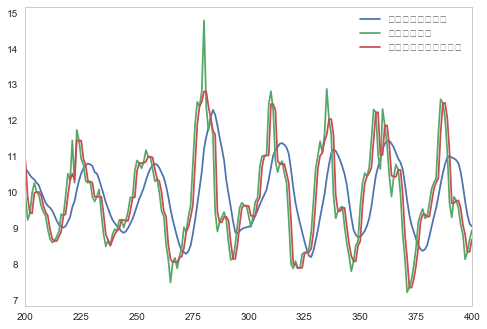

In [6]:
filter_offset=10
sensordata['全加速度模制滤波']=pd.rolling_mean(sensordata['全加速度模制'],filter_offset)
sensordata['全加速度模制滤波'].fillna(method='bfill',inplace=True)
sensordata['全加速度模制中值滤波']=sensordata['全加速度模制'].rolling(window=3).median()
sensordata['全加速度模制中值滤波'].fillna(method='bfill',inplace=True)
sensordata['加速度模制滤波']=pd.rolling_mean(sensordata['加速度模制'],filter_offset)
# tempamag=sensordata['加速度模制'].rolling(window=13).mean()
sensordata['加速度模制滤波'].fillna(method='bfill',inplace=True)
startindex=200
endindex=400
sensordata.loc[startindex:endindex,'全加速度模制滤波'].plot()
sensordata.loc[startindex:endindex,'全加速度模制'].plot()
sensordata.loc[startindex:endindex,'全加速度模制中值滤波'].plot()
plt.legend()
plt.grid()

In [6]:
step_detec=[]
wrong_list=[]
length_win=23
for item in sensordata.iterrows():
#     if item[0]>length_win/2+1:
    
    try:
#         print(sensordata[item[0]-length_win/2-1:item[0]+length_win/2+1,'加速度模制'])
#         print(item)
        break
#         step_detec.append(item[1]['加速度模制'])
#         if item[1]['加速度模制']==sensordata[item[0]-length_win/2-1:item[0]+length_win/2+1,'加速度模制'].max():
#             step_detec.append(item[0])
    except:
        wrong_list.append(item[0])
# step_detec
# wrong_list[:]

# 检峰或者分块

In [17]:
#经过0的点，每三个是一步
# sensordata[abs(sensordata['全加速度模制滤波']-9.8)<1e-1].index

step_index=[filter_offset]#10和滤波阶数有关
time_peak_threshold=1/3.0
magnitude_threshold=0.3
g_const=9.8
for item in sensordata.iterrows():
    if item[0]>0 and sensordata.shape[0]-1>item[0] and sensordata.loc[item[0]-1,'全加速度模制滤波']<g_const and sensordata.loc[item[0]+1,'全加速度模制滤波']>g_const:
#             if sensordata.loc[item[0],'时间']-sensordata.loc[step_index[-1],'时间']>time_peak_threshold:
#         if sensordata.loc[step_index[-1]:item[0],'全加速度模制滤波'].max()>g_const+magnitude_threshold or sensordata.loc[step_index[-1]:item[0],'全加速度模制滤波'].min()<g_const-magnitude_threshold:
            if item[0]-step_index[-1]>time_peak_threshold*50:
                step_index.append(int(item[0]))       
# sensordata['全加速度模制滤波']

In [14]:
sensordata['anzf']=sensordata['anz'].rolling(window=5).mean()
sensordata['anzf'].fillna(method='bfill',inplace=True)

18


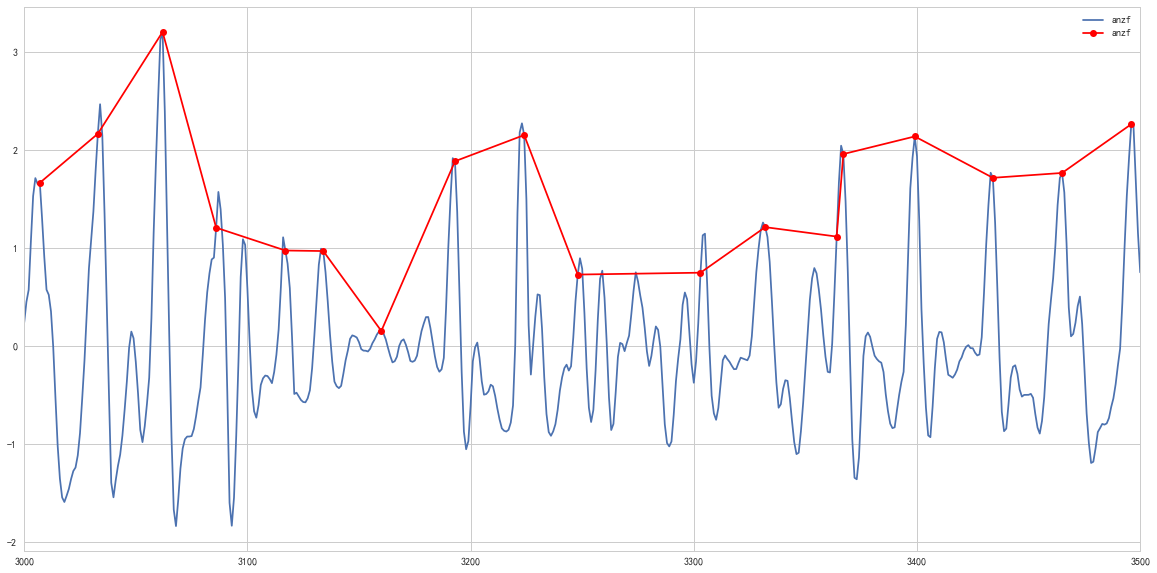

In [16]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.figure(figsize=(20,10))
data=sensordata.loc[3000:3500,'anzf']
# print type(data)
data.plot()
peakfind=signal.find_peaks_cwt(data,range(1,25))#感觉25点长的卷积可能是合适的
print len(peakfind)
y=sensordata.loc[peakfind+3000,'anzf']
# plt.plot(peakfind,y)
y.plot(marker='o',c='r')
plt.legend()


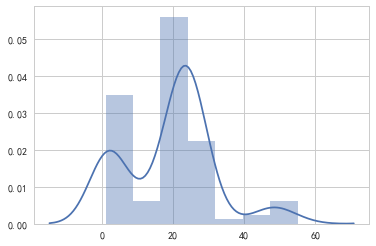

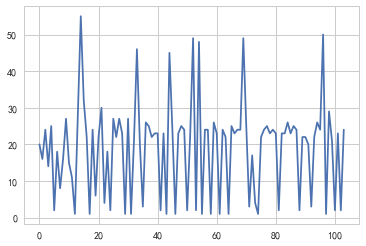

In [118]:
xp=peakfind[1:]-peakfind[:-1]
# sns.kdeplot(xp)
# plt.show()
sns.distplot(xp)
plt.show()
sns.plt.plot(xp)

In [115]:
print xp

[20 16 24 14 25  2 18  8 16 27 15 11  1 28 55 32 22  1 24  6 22 30  4 18  2
 27 22 27 23  1 27  1 21 46 20  3 26 25 22 23 23  2 23  1 45 24  1 23 25 24
  2 22 49  2 48  1 24 24  1 26 23  1 24 22  1 25 23 24 24 49 25  3 17  4  1
 22 24 25 23 24 23  2 23 23 26 23 25 24  2 22 22 20  3 22 26 24 50  1 29 21
  2 23  2 24]


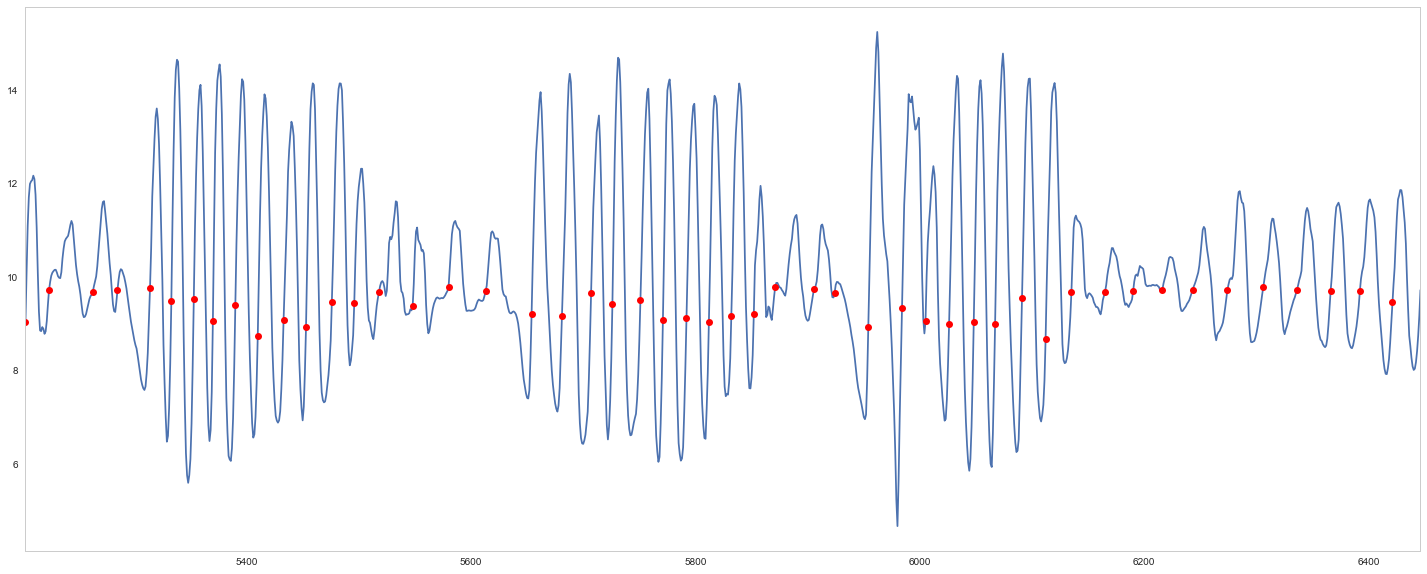

In [28]:
#简单查看下每步的效果
f_index=200
last_look=50
plt.figure(figsize=(25,10))
sensordata.loc[step_index[f_index]:step_index[f_index+last_look],'全加速度模制滤波'].plot()
x=step_index[f_index:f_index+last_look]
y=sensordata.loc[x,'全加速度模制滤波'].values.tolist()

plt.grid()
plt.plot(x,y,'ro')
plt.show()


## 自相关和偏相关性分析

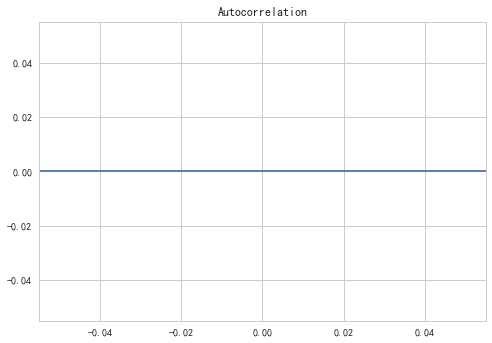

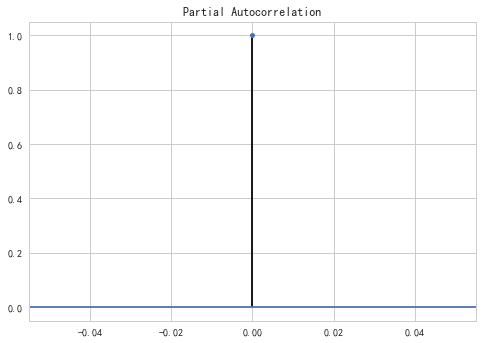

In [257]:
diff1 = sensordata.loc[:,'全加速度模制滤波']
# .diff(1)
# diff1 = sensordata.loc[100:200,'z轴旋转角']
# plt.plot(figsize=(25,10))
# plt.grid()
sm.graphics.tsa.plot_acf(diff1,lags=10)
plt.show()
sm.graphics.tsa.plot_pacf(diff1,lags=10)
plt.show()

## 去掉由于滤波产生的偏移

In [18]:
step_off_index=(np.array(step_index)-filter_offset).tolist()
step_off_index[:10]

[0, 24, 61, 78, 116, 144, 161, 212, 240, 267]

In [19]:
print '计步得步数为%d'%(len(step_index))

计步得步数为1269


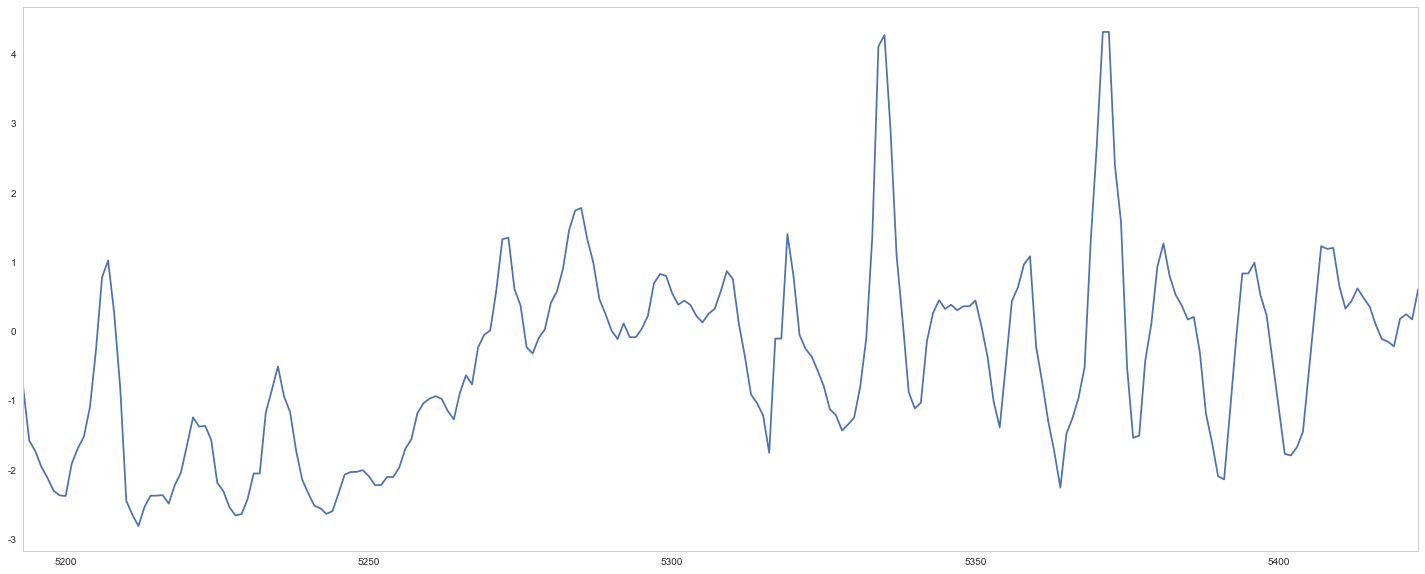

In [32]:
sensordata.loc[step_off_index[f_index]:step_off_index[f_index+10],'加速度z'].plot(figsize=(25,10))
plt.grid()

## 时间序列动态规整对比步的形状

In [13]:
def distance(x,y):
    return np.sqrt((x-y)*(x-y))
def dtw(X,Y):
#      X=[1,2,3,4]
#      Y=[1,2,7,4,5]
    M=[[distance(X[i],Y[j]) for i in range(len(X))] for j in range(len(Y))]
    l1=len(X)
    l2=len(Y) 
    D=[[0 for i in range(l1+1)] for i in range(l2+1)]
    D[0][0]=0 
    for i in range(1,l1+1):
        D[0][i]=sys.maxint
    for j in range(1,l2+1):
        D[j][0]=sys.maxint
    for j in range(1,l2+1):
        for i in range(1,l1+1):
            D[j][i]=M[j-1][i-1]+min(D[j-1][i],D[j][i-1],D[j-1][i-1]+M[j-1][i-1])
    value=D[l2][l1]
#     path=[[l2+1,l1+1]]
#     mmv=D[j][i]-M[j-1][i-1]
#     if D[j-1][i]==mmv:
#         path.append([j-1,i])
    
    return value,D

In [15]:
f_index=50
x=sensordata.iloc[step_index[f_index]:step_index[f_index+1],31].values.tolist()
f_index=550
y=sensordata.iloc[step_index[f_index+1]:step_index[f_index+2],31].values.tolist()

dtw的匹配结果是22.87
正则化后的dtw2的匹配结果是9.91


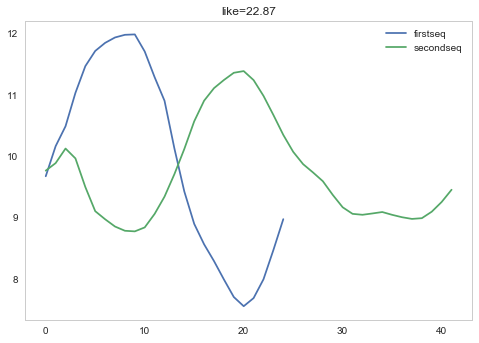

In [17]:
dtw_value,D=dtw(x,y)
print (u'dtw的匹配结果是%.2f'%(dtw_value))
plt.plot(x,label='firstseq')
plt.plot(y,label='secondseq')
plt.legend()
plt.grid()
plt.title('like=%.2f'%(dtw_value))
dtw_value,D=dtw2(x,y)
print (u'正则化后的dtw2的匹配结果是%.2f'%(dtw_value))

这种时间序列匹配的方法应该是忽略了幅值的影响，即使是同频率的正弦波，在他们幅值不同的时候也会得到较大的结果，所以需要改进他，先将其正则化，明显的思路是直接使用最大值减去最小值获得幅值，以及均值。
    在上面dtw和下面dtw2的方法对比上可以看到，对于50-1000这两步的结果，匹配值由最初的17.48降低到2.87
    针对步长检测的问题，由于输入的都是g上下波动，所以均值可以直接获得
    但是实验发现这种方法并不好，因为通常正负两边的幅值到g的距离不稳定

In [14]:
def dtw2(X,Y):
#      X=[1,2,3,4]
#      Y=[1,2,7,4,5]
    X=np.array(X)
    Y=np.array(Y)
#     X=(X-g_const)/(X.max()-g_const)#这样相当于直接使用了正向的形状作为了缩小的指标
#     Y=(Y-g_const)/(Y.max()-g_const)
    X=(X-(X.max()+X.min())/2.0)/(X.max()-(X.max()+X.min())/2.0)
    Y=(Y-(Y.max()+Y.min())/2.0)/(Y.max()-(Y.max()+Y.min())/2.0)
    M=[[distance(X[i],Y[j]) for i in range(X.shape[0])] for j in range(Y.shape[0])]
    l1=X.shape[0]
    l2=Y.shape[0] 
    D=[[0 for i in range(l1+1)] for i in range(l2+1)]
    D[0][0]=0 
    for i in range(1,l1+1):
        D[0][i]=sys.maxint
    for j in range(1,l2+1):
        D[j][0]=sys.maxint
    for j in range(1,l2+1):
        for i in range(1,l1+1):
            D[j][i]=M[j-1][i-1]+min(D[j-1][i],D[j][i-1],D[j-1][i-1]+M[j-1][i-1])
    value=D[l2][l1]
#     path=[[l2+1,l1+1]]
#     mmv=D[j][i]-M[j-1][i-1]
#     if D[j-1][i]==mmv:
#         path.append([j-1,i])
    
    return value,D

list index out of range
[9.7639953977652, 9.83786086586827, 9.903482456417894, 9.966058950077885, 10.03929841110127, 10.045108527930324, 9.92904380750571, 9.90657804218529, 9.857496594490492, 9.768798051229467, 9.749750097691551, 9.752650647808817, 9.754438741482563, 9.779811888581936, 9.773857003592425, 9.756841736711646, 9.771451871243869, 9.741403197100666, 9.725730195924312, 9.745521701539058, 9.705327522588265, 9.682488537422403, 9.715914654173726]
Wall time: 2.32 s


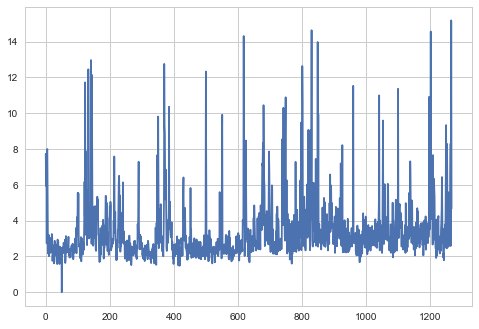

In [18]:
%%time
f_index=50
mb=sensordata.iloc[step_index[f_index]:step_index[f_index+1],31].values.tolist()
pplike=[]
for item in range(sensordata.shape[0]):
    try:
        mmitem=sensordata.iloc[step_index[item]:step_index[item+1],31].values.tolist()
        dtw_value,D=dtw2(mmitem,mb)
        pplike.append(dtw_value)
    except Exception as e:
        print e
        print mmitem
        break
plt.plot(pplike)

In [128]:
pplike.index(max(pplike))

363

## 使用快速傅里叶分析数据的频率信息

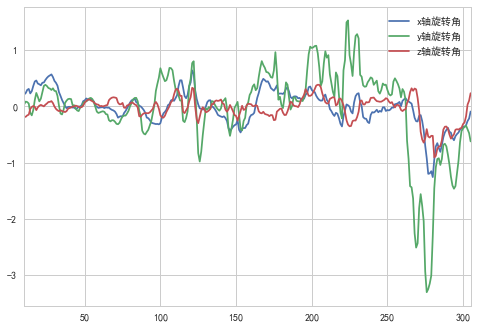

In [20]:
f_index=0
last_look=10
# wz=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],9]
# az=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],3]
# print (wz.name)
# plt.plot(wz,label='wz')
# plt.grid()
# plt.plot(az,label='az')
# sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],31].plot()
sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],7:10].plot()
# plt.legend()

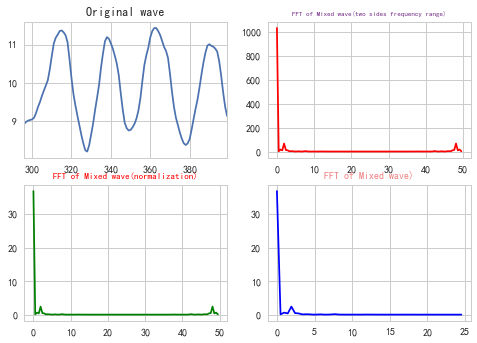

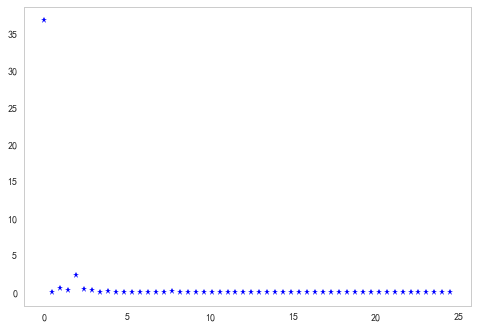

全加速度模制滤波最高频率为1.92Hz


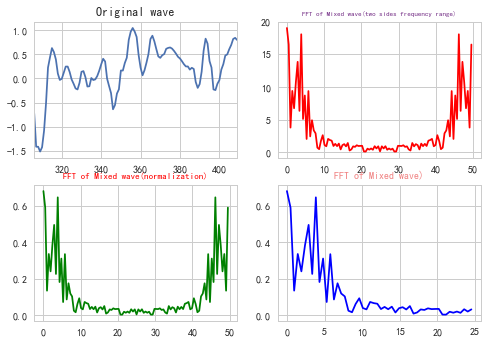

y轴旋转角最高频率为0.00Hz


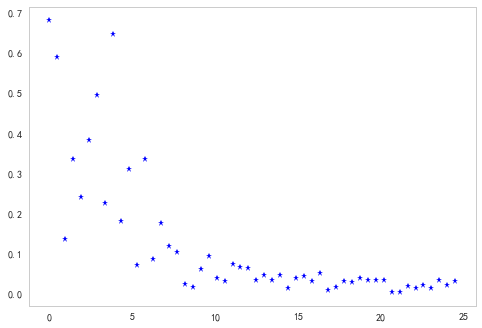

In [21]:
f_index=10
last_look=4
y=sensordata.iloc[step_off_index[f_index]:step_off_index[f_index+last_look],31]
Fs=50.0 #采样频率
yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分
x=range(step_index[f_index],step_index[f_index+1]+1)
freq=len(x)              #实际频率
yf=abs(yy)                # 取绝对值
yf1=abs(yy)/(len(x))           #归一化处理
yf2 = yf1[range(int(len(y)/2))]  #由于对称性，只取一半区间
xf = np.arange(len(y))*Fs/len(y)        # 频率
xf1 = xf
xf2 = xf[range(int(len(y)/2))]  #取一半区间


plt.subplot(221)
y.plot()   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()
plt.plot(xf2,yf2,'b*')
plt.grid()
plt.show()
yf2[0]=0
print('%s最高频率为%.2fHz'%(y.name,xf2[yf2.tolist().index(max(yf2))]))

#加速度

y=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],8]
Fs=50.0 #采样频率
yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分
x=range(step_index[f_index],step_index[f_index+1]+1)
freq=len(x)              #实际频率
yf=abs(yy)                # 取绝对值
yf1=abs(yy)/(len(x))           #归一化处理
yf2 = yf1[range(int(len(y)/2))]  #由于对称性，只取一半区间
xf = np.arange(len(y))*Fs/len(y)        # 频率
xf1 = xf
xf2 = xf[range(int(len(y)/2))]  #取一半区间


plt.subplot(221)
y.plot()   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()
plt.plot(xf2,yf2,'b*')
plt.grid()
# yf2[0]=0
print('%s最高频率为%.2fHz'%(y.name,xf2[yf2.tolist().index(max(yf2))]))

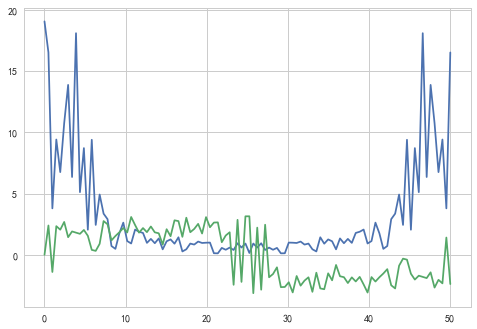

In [78]:
# yy=fft(y) 
# print y
# yy=fft(y,int(2*Fs+1))
yy=fft(y)
fq=np.linspace(0,Fs,len(yy))
# print np.arange(len(y))*Fs/len(y)
fm=np.abs(yy)
fa=np.angle(yy)
# plt.stem(np.angle(yy)/np.pi*180)
# fft??
sns.plt.plot(fq,fm)
sns.plt.plot(fq,fa)

In [79]:
fm

array([ 19.056012  ,  16.51929129,   3.78966079,   9.41271645,
         6.74847198,  10.74836458,  13.87307615,   6.3514062 ,
        18.09246617,   5.11122491,   8.71256354,   2.04615459,
         9.38811916,   2.43553866,   4.91959078,   3.35696385,
         2.90801248,   0.71423345,   0.48112435,   1.751123  ,
         2.62405486,   1.11833215,   0.92000016,   2.05846309,
         1.87992448,   1.78270634,   0.96971989,   1.2959318 ,
         0.94300764,   1.33361127,   0.44354173,   1.10019516,
         1.25432555,   0.90515207,   1.42738126,   0.27032076,
         0.44798227,   0.91393186,   0.8321331 ,   1.07839338,
         0.96260641,   0.98435186,   0.99376928,   0.12342578,
         0.11580215,   0.55976565,   0.40896525,   0.58496666,
         0.39110046,   0.93932326,   0.58952228,   0.918333  ,
         0.145278  ,   0.918333  ,   0.58952228,   0.93932326,
         0.39110046,   0.58496666,   0.40896525,   0.55976565,
         0.11580215,   0.12342578,   0.99376928,   0.98

In [74]:
def obtainfreq(y,mode=0):
    Fs=50.0 #采样频率
    yy=fft(y)                     #快速傅里叶变换
    yreal = yy.real               # 获取实数部分
    yimag = yy.imag               # 获取虚数部分
    x=range(step_index[f_index],step_index[f_index+1]+1)
    freq=len(x)              #实际频率
    yf=abs(yy)                # 取绝对值
    yf1=abs(yy)/(len(x))           #归一化处理
    yf2 = yf1[range(int(len(y)/2))]  #由于对称性，只取一半区间
    xf = np.arange(len(y))*Fs/len(y)        # 频率
    xf1 = xf
    xf2 = xf[range(int(len(y)/2))]  #取一半区间
    if mode==1:
        yf2[0]=0
    fqrvalue=xf2[yf2.tolist().index(max(yf2))]
#     print('%s最高频率为%.2fHz'%(y.name,fqrvalue))
    return fqrvalue
def obtainfreq2(y,mode=0):
    Fs=50.0 #采样频率
    yy=fft(y)                     #快速傅里叶变换
    yreal = yy.real               # 获取实数部分
    yimag = yy.imag               # 获取虚数部分
    x=range(last_look)
    freq=len(x)              #实际频率
    yf=abs(yy)                # 取绝对值
    yf1=abs(yy)/(len(x))           #归一化处理
    yf2 = yf1[range(int(len(y)/2))]  #由于对称性，只取一半区间
    xf = np.arange(len(y))*Fs/len(y)        # 频率
    xf1 = xf
    xf2 = xf[range(int(len(y)/2))]  #取一半区间
    if mode==1:
        yf2[0]=0
    fqrvalue=xf2[yf2.tolist().index(max(yf2))]
#     print('%s最高频率为%.2fHz'%(y.name,fqrvalue))
    return fqrvalue

In [18]:
%%time
# f_index=100
last_look=4
wzr=[]
ar=[]
wyr=[]
wxr=[]
# magx
for f_index in range(len(step_index)-last_look-1):
    try:
        y=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],9]
        wzr.append(obtainfreq(y))
        y=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],31]
        ar.append(obtainfreq(y,mode=1))
        y=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],8]
        wyr.append(obtainfreq(y))
        y=sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],7]
        wxr.append(obtainfreq(y))
    except:
        print f_index

Wall time: 40 ms


In [38]:
%%time
#使用等长的fft 128点
# f_index=100
last_look=128
wzr=[]
ar=[]
wyr=[]
wxr=[]
# magx
for f_index in range(sensordata.shape[0]-last_look-1):
#     try:
        y=sensordata.iloc[f_index:f_index+last_look,9]
        wzr.append(obtainfreq2(y))
        y=sensordata.iloc[f_index:f_index+last_look,31]
        ar.append(obtainfreq2(y,mode=1))
        y=sensordata.iloc[f_index:f_index+last_look,8]
        wyr.append(obtainfreq2(y))
        y=sensordata.iloc[f_index:f_index+last_look,7]
        wxr.append(obtainfreq2(y))
#     except:
#         print f_index

Wall time: 26.4 s


In [41]:
len(ar)

3483

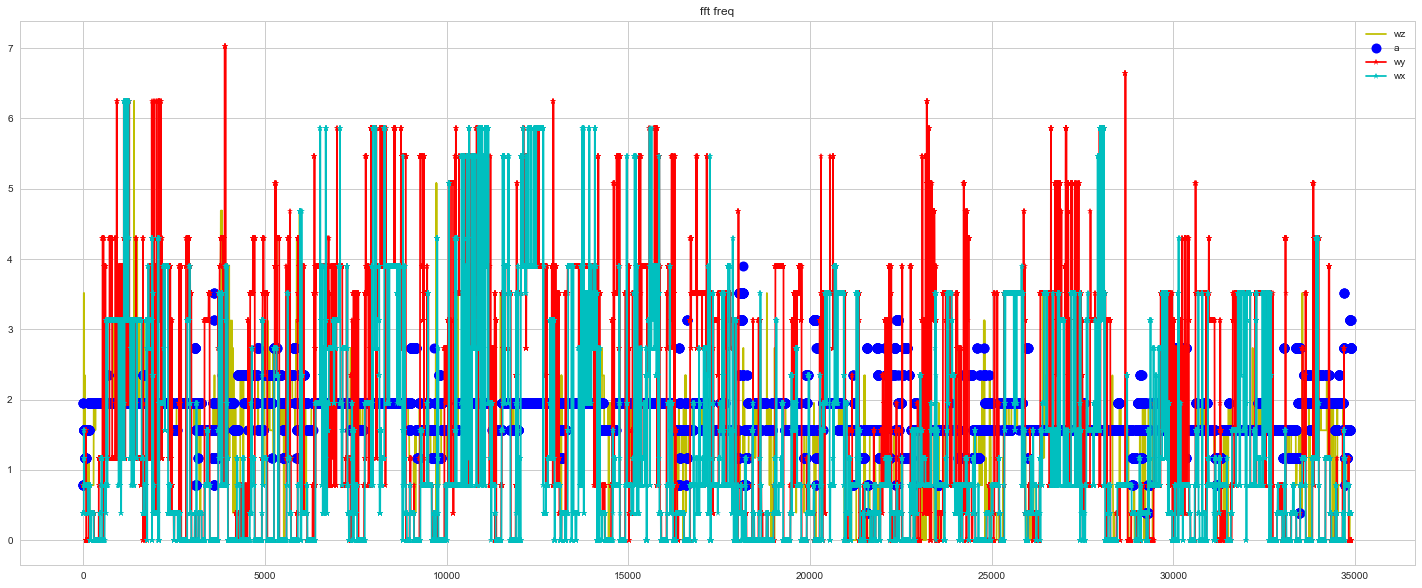

In [45]:
plt.figure(figsize=(25,10))
plt.plot(wzr,'y-',label='wz')
plt.plot(ar,'b.',label='a',markersize=20)
plt.plot(wyr,'r*-',label='wy')
plt.plot(wxr,'c-*',label='wx')
plt.title('fft freq')
plt.legend()
# plt.grid()

plt.savefig(r'C:\Users\HelloWorld\Desktop\tessstttyyy.png', dpi=500)
plt.show()

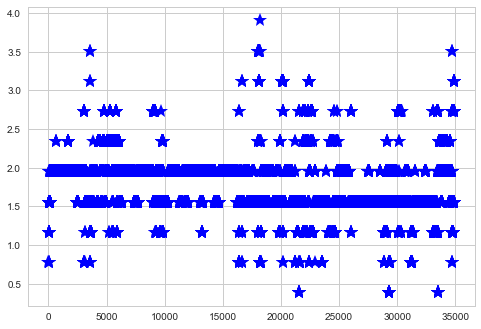

In [40]:
plt.plot(ar,'b*',label='a',markersize=15)

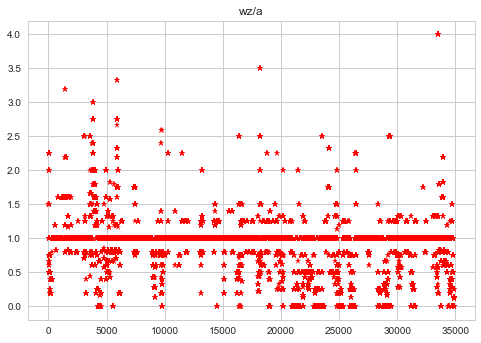

In [41]:
wzr=np.array(wzr)
ar=np.array(ar)
flag1=wzr/ar
plt.plot(flag1,'r*')
plt.title('wz/a')

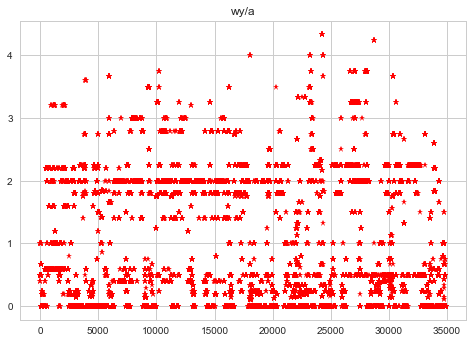

In [42]:
wyr=np.array(wyr)
# ar=np.array(ar)
flag=wyr/ar
plt.plot(flag,'r*')
plt.title('wy/a')
# describe_data(flag)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


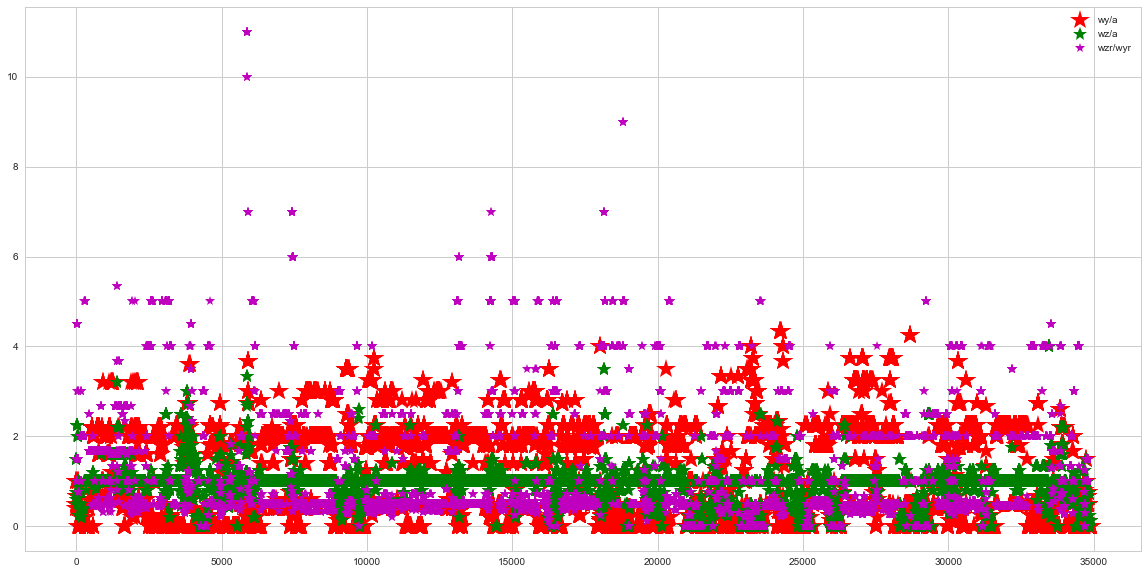

In [43]:
plt.figure(figsize=(20,10))
plt.plot(flag,'r*',markersize=20,label='wy/a')
plt.plot(flag1,'g*',markersize=15,label='wz/a')
plt.plot(wzr/wyr,'m*',markersize=10,label='wzr/wyr')
plt.legend()
plt.show()

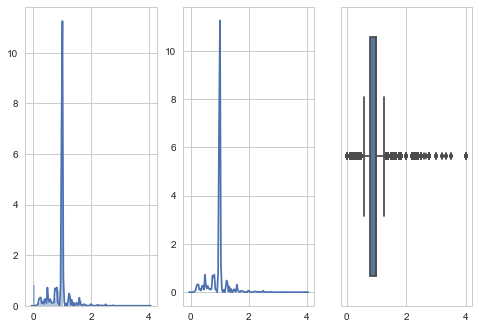

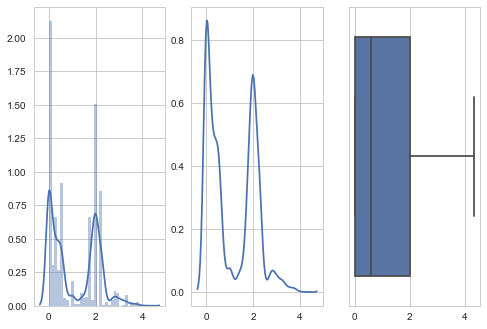

In [46]:
# plt.figure(figsize=(20,10))
fig, axes = plt.subplots(1,3)
sns.distplot(flag1,ax = axes[0])
sns.kdeplot(flag1, ax = axes[1])
sns.boxplot(flag1,ax=axes[2])
plt.show()
# plt.figure(figsize=(20,10))
fig, axes = plt.subplots(1,3)
sns.distplot(flag,ax = axes[0])
sns.kdeplot(flag, ax = axes[1])
sns.boxplot(flag,ax=axes[2])
plt.show()


In [116]:
g = sns.FacetGrid(flag, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill",  color="r")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

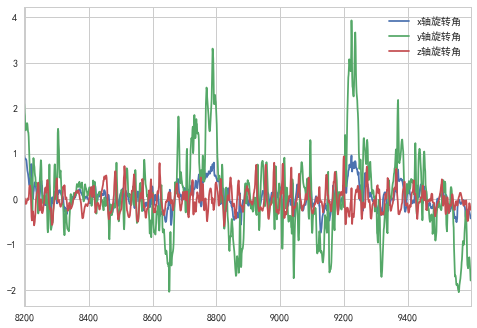

In [46]:
# sensordata.iloc[:,9].plot()
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
f_index=300
last_look=50
sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],7:10].plot()
# sensordata.iloc[step_index[f_index]:step_index[f_index+last_look],31].plot()

In [ ]:
# ry=rfft(y)/lenx

角速度wz的频率是3.15Hz,然而加速度的频率确是2.10Hz，为啥呢？是手臂摆动和步频不一致吗
1.在正常行走时，也就是300步左右时，事实上角速度和加速度的频域分量吻合的非常好
2.在楼梯时也就是150步左右时，发现其角速度分量会增加到3.1hz附近，而加速度分量则会降低到1.8hz左右

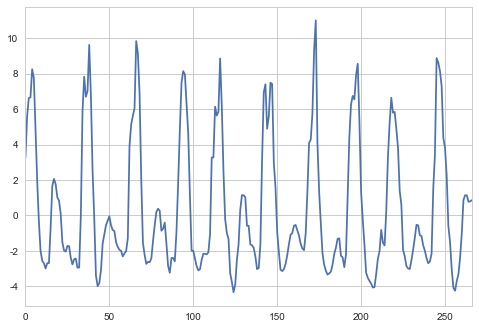

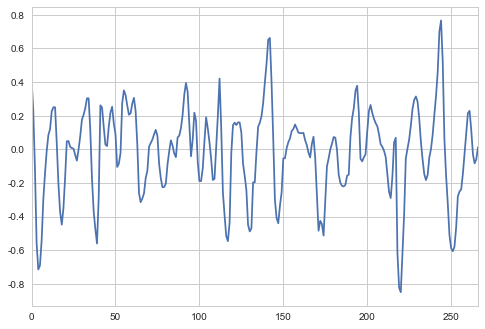

In [23]:
f_index=150
sns.tsplot(sensordata.loc[step_index[f_index]:step_index[f_index+10],'加速度y'])
plt.show()
sns.tsplot(sensordata.loc[step_index[f_index]:step_index[f_index+10],'z轴旋转角'])


# 根据检测结果，更新位置（PDR）

## 初始化

In [11]:
initalx=0
initaly=0
initalz=0
initalheading=np.pi

## 获得步长

In [49]:
def strides_Length():
    return 0.5

## 航向角（heading）计算

In [8]:
def heading(wb,Cnb):
    wn=np.dot(wb,Cnb)
    return wn
#将所得角度转入所处的区域内
def handle_angle(angle):
    if angle<-np.pi:
        angle=angle+np.pi*2
    elif angle>np.pi:
        angle=angle-np.pi*2
    return angle

### 直接将航向角乘以已知旋转矩阵

In [9]:
#将角度乘以旋转矩阵
# %%time
sensordata['wnx']=sensordata['x轴旋转角'].copy()
sensordata['wny']=sensordata['y轴旋转角'].copy()
sensordata['wnz']=sensordata['z轴旋转角'].copy()
wnx=[]
wny=[]
wnz=[]
for item in range(sensordata.shape[0]):
    wb=sensordata.iloc[item,7:10].values
    Cnb=sensordata.iloc[item,15:24].values.reshape([3,3])
    wn = heading(Cnb,wb)
    sensordata.loc[item,'wnx']=wn[0]
    sensordata.loc[item,'wny']=wn[1]
    sensordata.loc[item,'wnz']=wn[2]
    

Wall time: 18.2 s


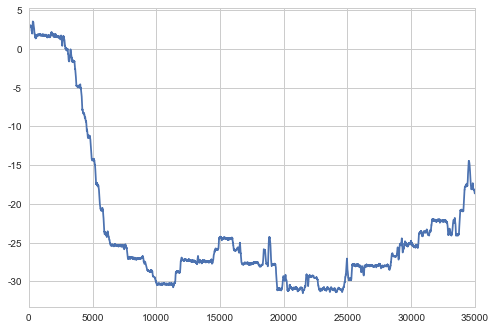

In [12]:
%%time
sensordata['jifen']=0
for item in range(sensordata.shape[0]):
    if item>0:
        sensordata.loc[item,'jifen']=sensordata.loc[item-1,'jifen']-(sensordata.loc[item-1,'wnz']+sensordata.loc[item,'wnz'])/2.0*(sensordata.loc[item,'时间']-sensordata.loc[item-1,'时间'])
    else:
        sensordata.loc[item,'jifen']=initalheading
sensordata['jifen'].plot()

In [53]:
#对积分值滤波
# filter_offset=10
b,a = signal.butter(3,0.08,'low')  
b,a = signal.butter(3,0.10,'high') 
sf = signal.filtfilt(b,a,xx) 
sensordata['wnzfilter']=sensordata['wnz'].rolling(window=10).mean()
sensordata['wnzfilter'].fillna(method='bfill',inplace=True)
sensordata['wnz'].plot()
sensordata['wnzfilter'].plot()
plt.legend()

NameError: name 'signal' is not defined

### 四元数法

In [158]:
#四元数法 q=（w,x,y,z),目前也没作用
#参考网页：http://www.cnblogs.com/dreamfactory/archive/2012/10/12/2721437.html
#核心算法1，欧拉角转四元数
#由欧拉角（变化量），求旋转轴
def QuaternionFromEulerAngle(EularAngle):
    Pitch,Roll,Yaw=EularAngle
    fCosHRoll=np.cos(Roll*0.5)
    fSinHRoll = np.sin(Roll * 0.5)
    fCosHPitch = np.cos(Pitch * .5)
    fSinHPitch = np.sin(Pitch * .5)
    fCosHYaw = np.cos(Yaw * .5)
    fSinHYaw = np.sin(Yaw * .5)
    w = fCosHRoll * fCosHPitch * fCosHYaw + fSinHRoll * fSinHPitch * fSinHYaw
    x = fCosHRoll * fSinHPitch * fCosHYaw + fSinHRoll * fCosHPitch * fSinHYaw
    y = fCosHRoll * fCosHPitch * fSinHYaw - fSinHRoll * fSinHPitch * fCosHYaw
    z = fSinHRoll * fCosHPitch * fCosHYaw - fCosHRoll * fSinHPitch * fSinHYaw
    return (w,x,y,z)
#核心算法2，四元数转欧拉角
#由四元数求得欧拉角
def CLAMP(x , min , max):
    if(x) > (max):
        return max
    elif(x) < (min):
        return min
    else:
        return x
def QuaternionToEulerAngle(q):
    w,x,y,z=q
    Roll  = np.arctan2(2*(w*z+x*y),1-2*(z*z+x*x))
    Pitch = np.arcsin(2*(w*x-y*z))
#     Pitch = np.arcsin(CLAMP(2*(w*x-y*z),-1.0,1.0))
    Yaw   = np.arctan2(2*(w*y+z*x),1-2*(x*x+y*y))
    return (Pitch,Roll,Yaw)
#次要的规范化算法：//为什么要进行规范化？
def  QuaternionNormalize(q):
    w,x,y,z=q
    s=np.sqrt(w*w+x*x+y*y+z*z)
    w/=s
    x/=s
    y/=s
    z/=s
    return (w,x,y,z)

#核心算法3，四元数乘法
def QuaternionMultiply(a,b):
    w=a[0]*b[0] -a[1]*b[1] -a[2]*b[2] -a[3]*b[3]
    x=a[0]*b[1] +a[1]*b[0] +a[2]*b[3] -a[3]*b[2]
    y=a[0]*b[2] -a[1]*b[3] +a[2]*b[0] +a[3]*b[1]
    z=a[0]*b[3] +a[1]*b[2] -a[2]*b[1] +a[3]*b[0]
    w,x,y,z=QuaternionNormalize((w,x,y,z))
    return (w,x,y,z)

In [189]:
%%time
# qn=(1,0,0,0)
qn=QuaternionFromEulerAngle((0,-np.pi/2,np.pi/2))
Eular_0=(0,0,0)
result_Eular=[]
for item in range(sensordata.shape[0]-1):
    wx,wy,wz=sensordata.iloc[item,7:10]
    wz=-wz
    Eular_b=np.array([wx,wy,wz])*(sensordata.loc[item+1,'时间']-sensordata.loc[item,'时间'])
    qb=QuaternionFromEulerAngle(Eular_b)
    qn=QuaternionMultiply(qn,qb)
    Eular_n=QuaternionToEulerAngle(qn)
    result_Eular.append(Eular_n)

Wall time: 9.48 s


In [129]:
sensordata.loc[item+1,'时间']-sensordata.loc[item,'时间']

0.023000001907348633

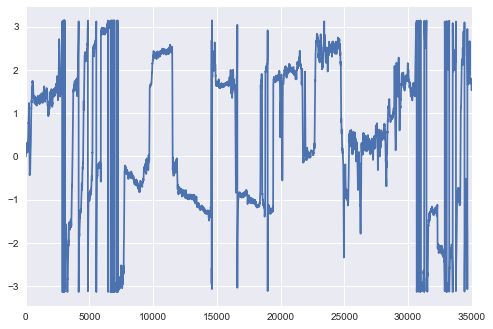

In [203]:
sns.tsplot(Eunp[:,2])

### 直接获得的方向角

In [32]:
def processcompass(x):
    if x>np.pi:
        x=x-2*np.pi
    elif x<-np.pi:
        x=x+2*np.pi
    return x

In [33]:
#这个容易导致其他数都变化，原因还不明确，但是可以先做这个试试
deta=sensordata.loc[:10,'方向角绕z'].mean()-initalheading
sensordata['方向角绕z修改']=sensordata['方向角绕z']-deta
sensordata['方向角绕z修改']=sensordata['方向角绕z修改'].apply(processcompass)
# sensordata.loc[sensordata['方向角绕z修改']>np.pi,]=sensordata[sensordata['方向角绕z修改']>np.pi]-np.pi*2
# sensordata[sensordata['方向角绕z修改']<-np.pi]=sensordata[sensordata['方向角绕z修改']<-np.pi]+np.pi*2
# sensordata.head()

,参考号,加速度x,加速度y,加速度z,重力x,重力y,重力z,x轴旋转角,y轴旋转角,z轴旋转角,...,加速度模制,全加速度模制,全加速度模制滤波,全加速度模制中值滤波,加速度模制滤波,wnx,wny,wnz,jifen,方向角绕z修改
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.690953,9.190150,0.351982,0.000000,0.000000,0.000000,3.141593,2.989918
1,1,-0.338806,0.040237,-0.278107,6.488892,7.267563,1.115524,0.052460,0.124390,0.026077,...,0.440173,9.587949,8.690953,9.190150,0.351982,-0.009046,0.044255,0.129864,3.139515,-3.113533
2,2,-0.588196,-0.326111,0.083572,6.466614,7.284103,1.136841,-0.000793,0.005432,-0.050613,...,0.677722,9.190150,8.690953,9.190150,0.351982,0.050837,0.001360,-0.002356,3.137921,-3.107497
3,3,-0.436523,-0.208130,0.079086,6.460312,7.290421,1.132080,0.049561,-0.067184,-0.084030,...,0.490026,9.376129,8.690953,9.376129,0.351982,0.077352,-0.085551,-0.026997,3.138567,-3.114612
4,4,0.156097,0.048660,-0.230301,6.421021,7.331573,1.089005,0.119888,0.034271,-0.156219,...,0.282440,9.922887,8.690953,9.376129,0.351982,0.162977,-0.076557,0.086773,3.137820,-3.112911


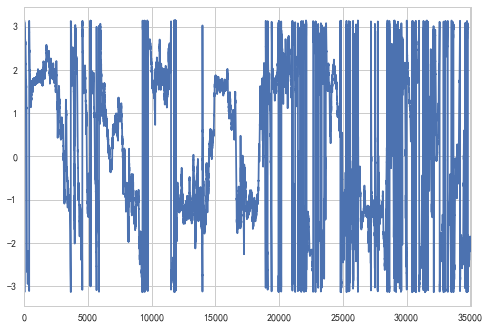

In [34]:
sensordata.loc[:,'方向角绕z修改'].plot()

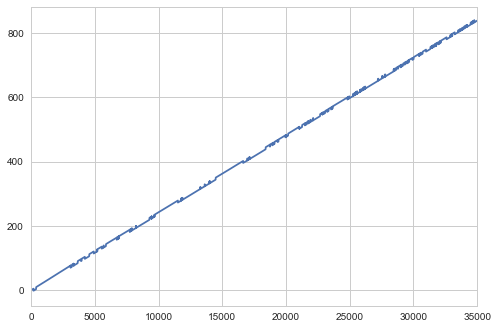

In [36]:
# sensordata.iloc[:,35].plot()
# plt.plot(sensordata.loc[:,'时间']-sensordata.loc[0,'时间'])
stime=sensordata.loc[0,'时间']
sensordata.loc[:,'时间差']=sensordata.loc[:,'时间']-stime
sensordata.loc[:,'时间差'].plot()

## 更新位置

In [ ]:
#对直接获得的角度进行简单滤波


In [40]:
%%time
position=[[0,0,0,0]]
hangel=[[initalheading,initalheading]]
# hd=np.pi
for item in range(len(step_off_index)-1):
    sL=strides_Length()
    hd=0
# #     print item
    for iindex in range(step_off_index[item],step_off_index[item+1]):
#         hd=hd+Eunp[iindex,2]
        hd=hd+(sensordata.loc[iindex,'wnzfilter']+sensordata.loc[iindex+1,'wnzfilter'])/2.0*(sensordata.loc[iindex+1,'时间']-sensordata.loc[iindex,'时间'])
#     hd=Eunp[step_off_index[item],2]
    hd=hangel[-1][0]-hd
    lx=position[-1][0]+sL*np.sin(hd)
    ly=position[-1][1]+sL*np.cos(hd)
    hdfxz=sensordata.loc[step_off_index[item],'方向角绕z修改']
    lx2=position[-1][2]+sL*np.sin(hdfxz)
    ly2=position[-1][3]+sL*np.cos(hdfxz)
    
    hangel.append([hd,hdfxz])
    position.append([lx,ly,lx2,ly2])

Wall time: 1.09 s


In [67]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

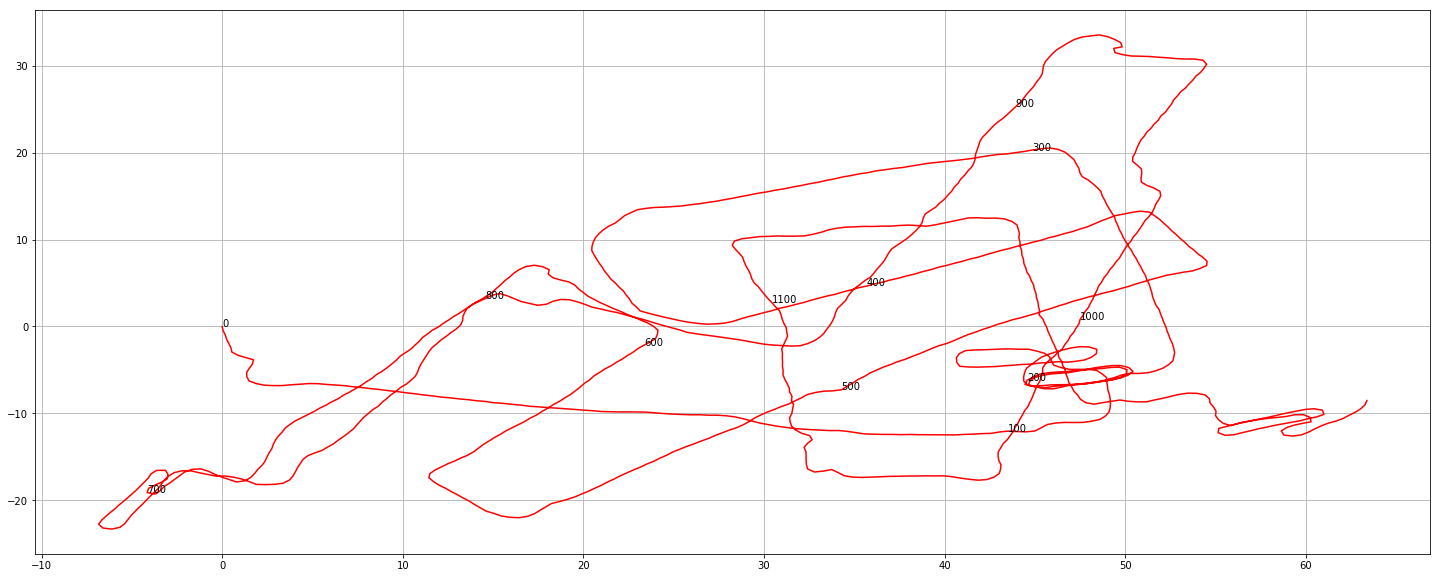

In [17]:
position_np=np.array(position)
plt.figure(figsize=(25,10))
plt.plot(position_np[:,0],position_np[:,1],'r')
plt.grid()
for il in np.arange(12)*100:
    il=int(il)
    plt.text(position_np[il,0],position_np[il,1],str(il))
    
plt.savefig(r'C:\Users\HelloWorld\Desktop\position.png', dpi=500)

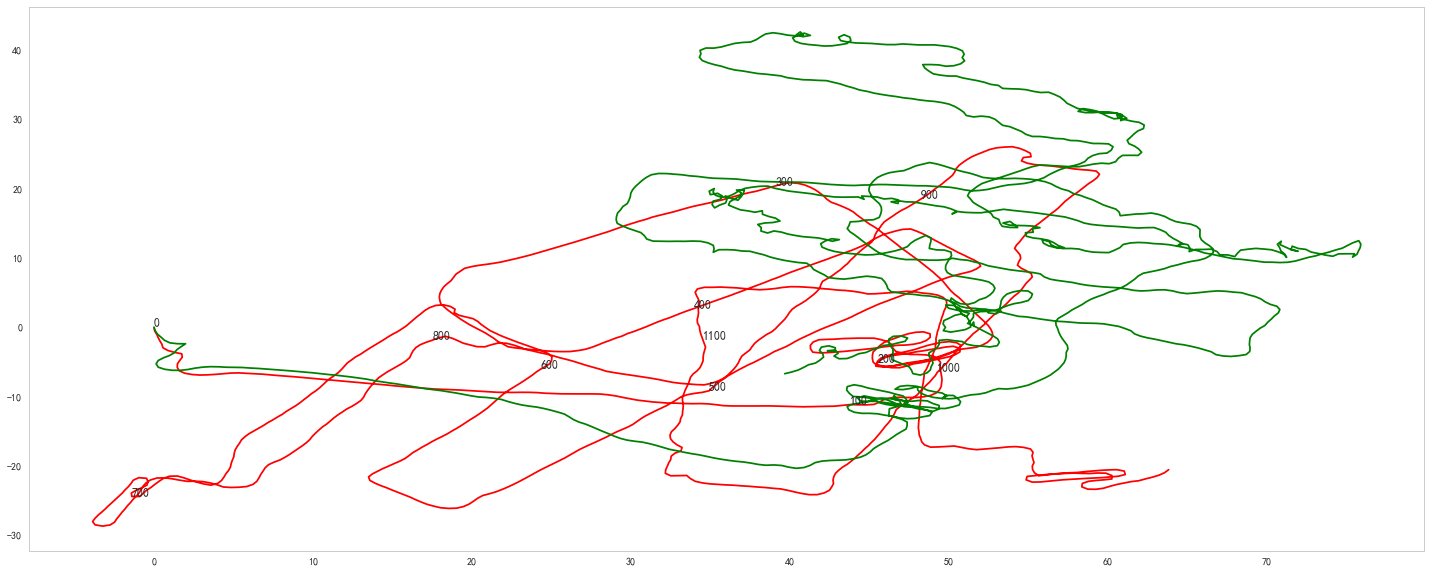

In [41]:
position_np=np.array(position)
plt.figure(figsize=(25,10)) 
plt.plot(position_np[:,0],position_np[:,1],'r')
plt.plot(position_np[:,2],position_np[:,3],'g')
plt.grid()
for il in np.arange(12)*100:
    il=int(il)
    plt.text(position_np[il,0],position_np[il,1],str(il))
# plt.title('quar pic no effct')    
# plt.savefig(r'C:\Users\HelloWorld\Desktop\position.png', dpi=500)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.


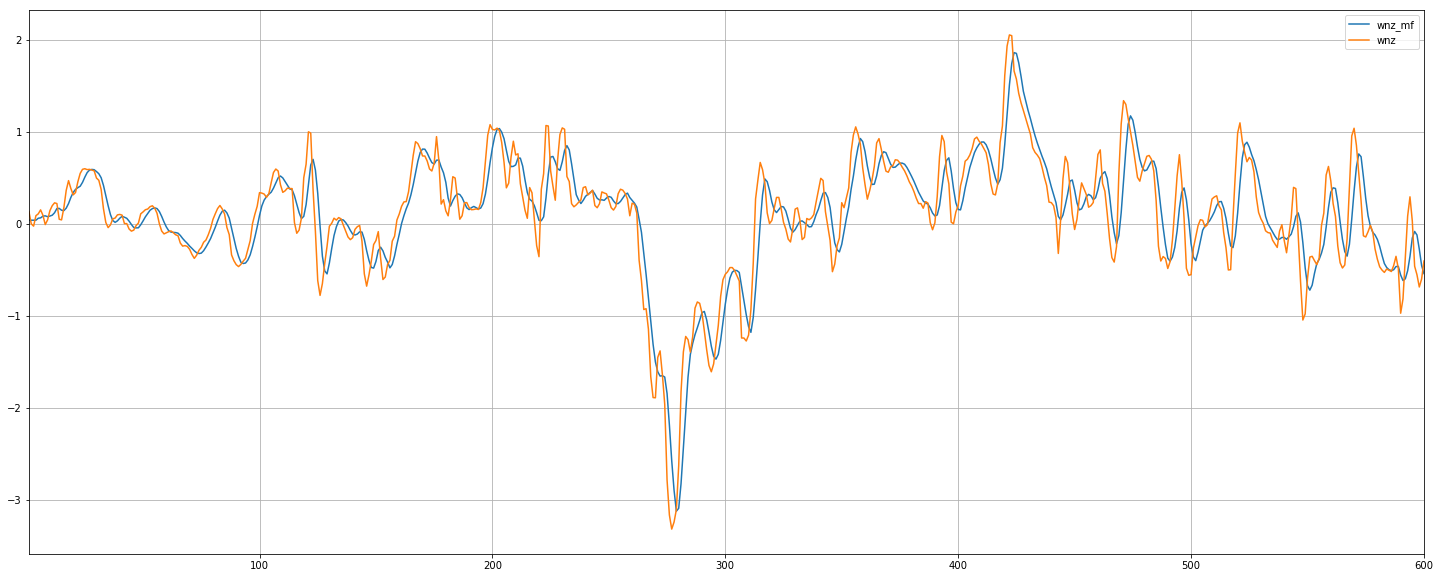

In [25]:
# sensordata['wnz_mf']=pd.rolling_mean(sensordata['wnz'],5)
# sensordata['wnz_mf'].fillna(method='bfill',inplace=True)
# plt.figure(figsize=(25,10))
# sensordata.loc[1:600,'wnz_mf'].plot()
# sensordata.loc[1:600,'wnz'].plot()
# plt.grid()
# plt.legend()

# 航向角问题的各种尝试

## 目前角度的对比

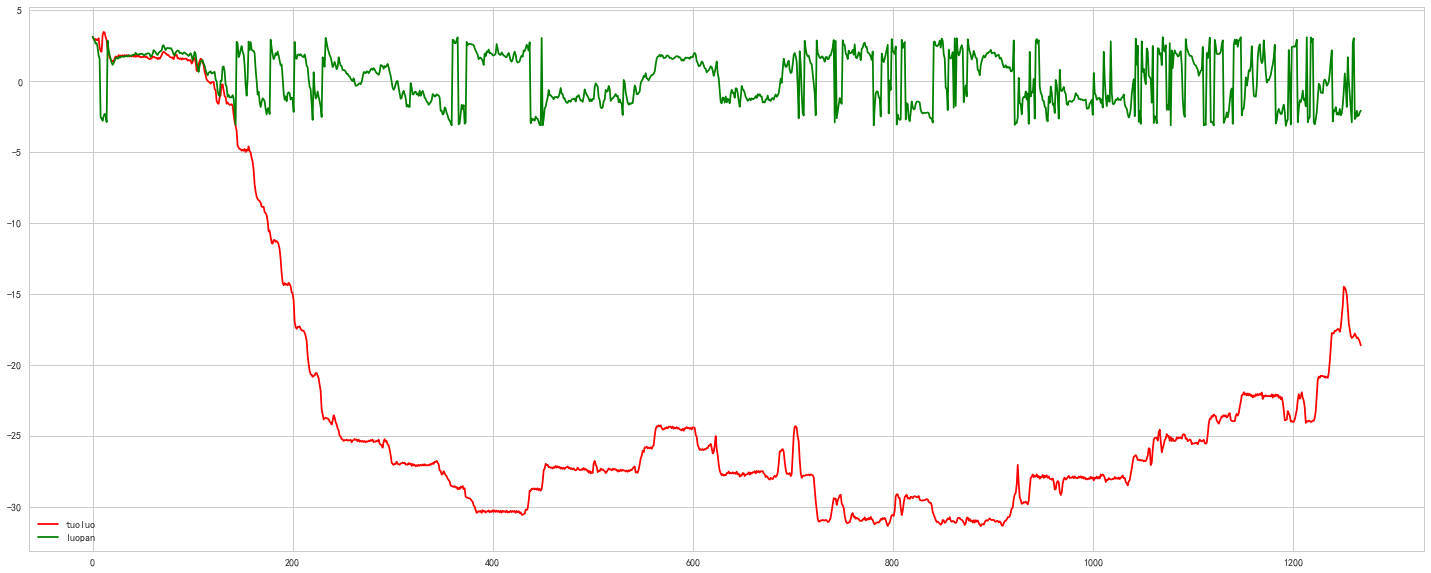

In [37]:
#陀螺积分角度，罗盘，pca等
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.figure(figsize=(25,10))
hangel=np.array(hangel)
plt.plot(hangel[:,0],'r',label='tuoluo')
plt.plot(hangel[:,1],'g',label='luopan')
# plt.plot(sensordata.loc[step_index[:],'方向角绕z修改'].values.tolist(),'g',label='luopan')
plt.legend()
plt.show()


## 加速度的pca

In [13]:
#先将各种加速度转化到标准坐标系下
# %%time

sensordata['anx']=sensordata['加速度x']
sensordata['any']=sensordata['加速度y']
sensordata['anz']=sensordata['加速度z']
wnx=[]
wny=[]
wnz=[]
for item in range(sensordata.shape[0]):
    wb=sensordata.iloc[item,1:4].values
    Cnb=sensordata.iloc[item,15:24].values.reshape([3,3])
    wn = heading(Cnb,wb)
    sensordata.loc[item,'anx']=wn[0]
    sensordata.loc[item,'any']=wn[1]
    sensordata.loc[item,'anz']=wn[2]
  

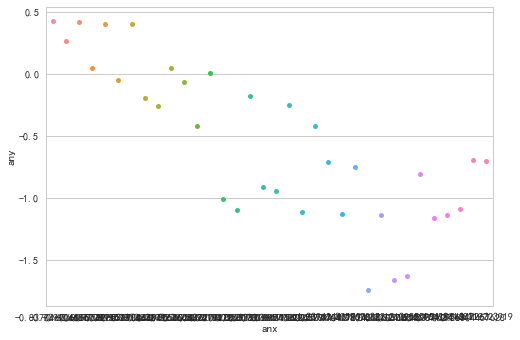

In [39]:
f_index=100
data=np.array(sensordata.loc[step_index[f_index]:step_index[f_index+1],('anx','any')].values.tolist())
# sns.stripplot(data[:,0],data[:,1])
sns.stripplot(sensordata.loc[step_index[f_index]:step_index[f_index+1],'anx'],sensordata.loc[step_index[f_index]:step_index[f_index+1],'any'])

In [40]:
#rloadAtan 重载atan的函数
# 反三角函数和目前用的西北天是又区别的
# Heading 取出的角度是和y的夹角
# 而三角函数默认是和x的夹角
# 造成了向东，应该是pi/2
# 但是实际是atan(0/1)=0
# Atan   heding
# 0         ±pi/2
# -pi/2     ±pi
# Pi/2       0
def rloadAtan(x,y):
    heading=np.arctan2(y,x)
    if x==0:
        if y>0:
            heading=np.pi/2
        else:
            heading=-np.pi/2
    if y==0 and x<0:
        heading=np.pi
    heading=-heading+np.pi/2
    

In [71]:
%%time
cor_pca_angle=[]
for f_index in range(len(step_index)-1):
    xangel=sensordata.loc[step_index[f_index]:step_index[f_index+1],'方向角绕z修改'].mean()
#     print f_index
#     f_index+=1
    data=np.array(sensordata.loc[step_index[f_index]:step_index[f_index+1],('anx','any')].values.tolist())
    pca=PCA(n_components='mle', copy=False) 
    newd=pca.fit_transform(data)
    covalue=pca.get_covariance()
    try:
        beliv=pca.explained_variance_ratio_[0]
    except :
        beliv=0
    # print covalue
#     print pca.explained_variance_ratio_    
#     plt.scatter(data[:,0],data[:,1])
#     plt.plot([0,covalue[0,0]],[0,covalue[1,0]])
    # plt.title(u'特征方差%.2f'%(pca.explained_variance_ratio_[0]))
    pcaangle=np.arctan2(covalue[1,0],covalue[0,0])
    if pcaangle<0:
        pcaangle2=(np.pi+pcaangle)
    if pcaangle>0:
        pcaangle2=(np.pi-pcaangle)

    pcaangle=-pcaangle+np.pi*.5
    pcaangle2=-pcaangle2+np.pi*.5
#     print pcaangle*180/np.pi,pcaangle2*180/np.pi,xangel*180/np.pi
    if abs(pcaangle-xangel)<abs(pcaangle2-xangel) and abs(pcaangle-xangel)<15*np.pi/180:
        result_pca=pcaangle
    elif abs(pcaangle-xangel)>=abs(pcaangle2-xangel) and abs(pcaangle2-xangel)<15*np.pi/180:
        result_pca=pcaangle2
    else:
        result_pca=44
#     print abs(pcaangle-xangel),abs(pcaangle2-xangel),15*np.pi/180
#     print result_pca
    cor_pca_angle.append([beliv,result_pca])
#     cor_pca_angle=np.array(cor_pca_angle)

Wall time: 1.9 s


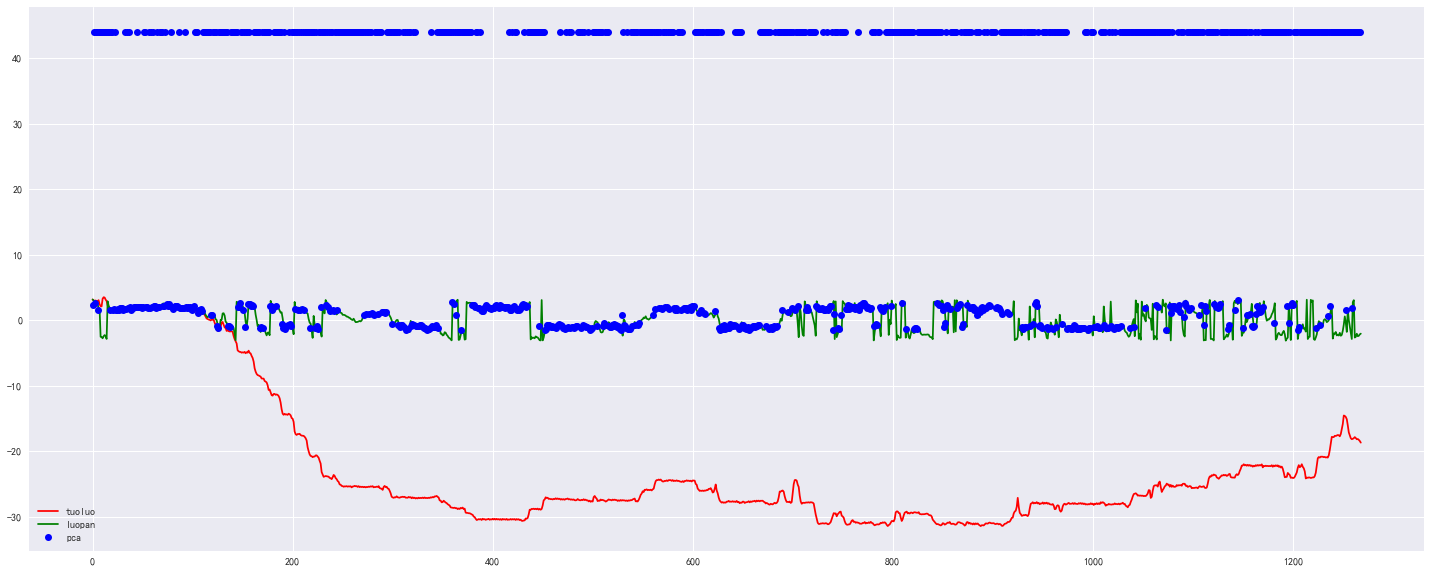

In [72]:
#陀螺积分角度，罗盘，pca等
cor_pca_angle=np.array(cor_pca_angle)
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.figure(figsize=(25,10))
hangel=np.array(hangel)
plt.plot(hangel[:,0],'r',label='tuoluo')
plt.plot(hangel[:,1],'g',label='luopan')
plt.plot(cor_pca_angle[:,1],'bo',label='pca')
# plt.plot(sensordata.loc[step_index[:],'方向角绕z修改'].values.tolist(),'g',label='luopan')
plt.legend()
plt.show()


Wall time: 4.3 s


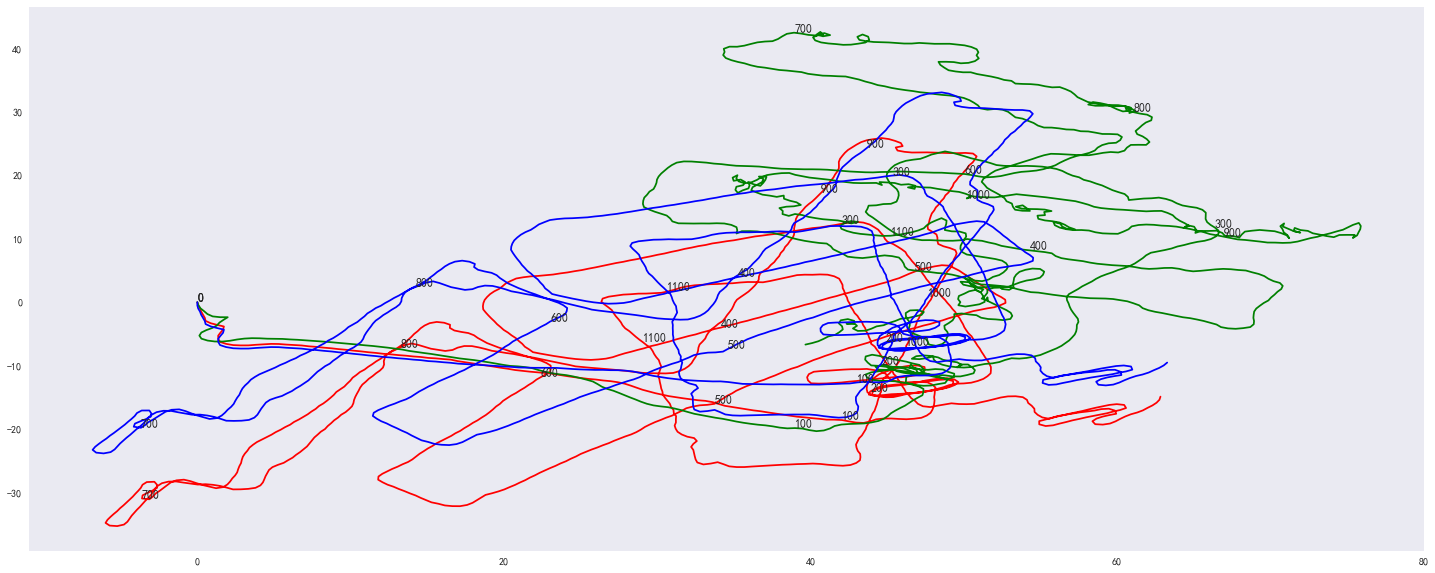

In [69]:
%%time
position=[[0,0,0,0,0,0]]
hangel=[[initalheading,initalheading,initalheading]]
# hd=np.pi
for item in range(len(step_off_index)-1):
    sL=strides_Length()
    hd=0
# #     print item
    for iindex in range(step_off_index[item],step_off_index[item+1]):
#         hd=hd+Eunp[iindex,2]
        hd=hd+(sensordata.loc[iindex,'wnz']+sensordata.loc[iindex+1,'wnz'])/2.0*(sensordata.loc[iindex+1,'时间']-sensordata.loc[iindex,'时间'])
#     hd=Eunp[step_off_index[item],2]
    if cor_pca_angle[item,0]>0.9 and cor_pca_angle[item,1]<40:
        hd=cor_pca_angle[item,1]-hd
    else:
        hd=hangel[-1][0]-hd
    lx=position[-1][0]+sL*np.sin(hd)
    ly=position[-1][1]+sL*np.cos(hd)
    hdfxz=sensordata.loc[step_off_index[item],'方向角绕z修改']
    lx2=position[-1][2]+sL*np.sin(hdfxz)
    ly2=position[-1][3]+sL*np.cos(hdfxz)
    h1=sensordata.loc[step_off_index[item],'jifen']
    lx3=position[-1][4]+sL*np.sin(h1)
    ly3=position[-1][5]+sL*np.cos(h1)   
    hangel.append([hd,hdfxz,h1])
    position.append([lx,ly,lx2,ly2,lx3,ly3])
    
position_np=np.array(position)
plt.figure(figsize=(25,10))
plt.plot(position_np[:,0],position_np[:,1],'r',label='pca')
plt.plot(position_np[:,2],position_np[:,3],'g',label='lp')
plt.plot(position_np[:,4],position_np[:,5],'b',label='jf')
plt.grid()
for il in np.arange(12)*100:
    il=int(il)
    plt.text(position_np[il,0],position_np[il,1],str(il))
    plt.text(position_np[il,2],position_np[il,3],str(il))
    plt.text(position_np[il,4],position_np[il,5],str(il))
plt.legend()
# plt.title('quar pic no effct')    
plt.savefig(r'C:\Users\HelloWorld\Desktop\position.png', dpi=500)

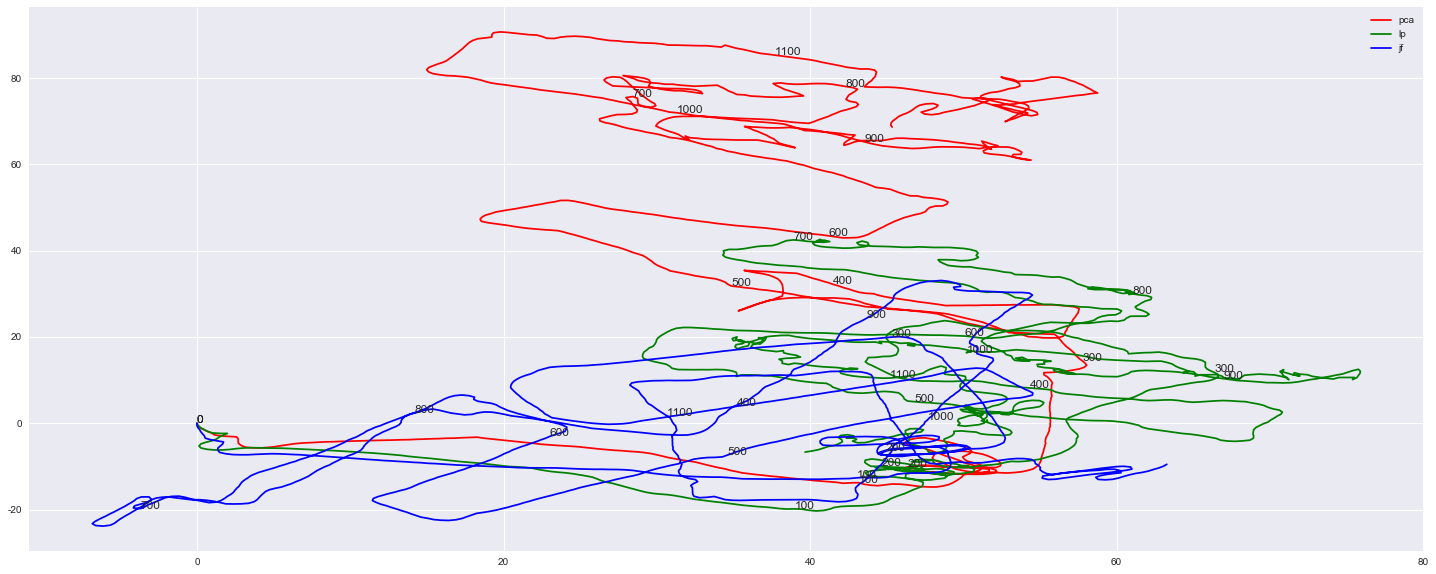

In [65]:
sns.set()
plt.figure(figsize=(25,10))
plt.plot(position_np[:,0],position_np[:,1],'r',label='pca')
plt.plot(position_np[:,2],position_np[:,3],'g',label='lp')
plt.plot(position_np[:,4],position_np[:,5],'b',label='jf')
# plt.grid()
for il in np.arange(12)*100:
    il=int(il)
    plt.text(position_np[il,0],position_np[il,1],str(il))
    plt.text(position_np[il,2],position_np[il,3],str(il))
    plt.text(position_np[il,4],position_np[il,5],str(il))
# plt.title('quar pic no effct') 
plt.legend()
# plt.savefig(r'C:\Users\HelloWorld\Desktop\position.png', dpi=500)

# 找寻其他特征

In [86]:
def sma(x,t):
    result=0
    for item in x:
        result+=item*t
    result=sum(result)/len(t)
    return result
def energy(x):
    result=0
    for item in x:
        result+=item*item
    result = result/len(x)
    return result
def iqr(x):
    return stats.quantile(scores,p=0.25)-stats.quantile(scores,p=0.75)
def cal_entropy(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy
#集中趋势的度量 
def describe_data(scores):
    print u'求和：',np.sum(scores)  
    print u'个数：',len(scores)  
    print u'平均值:',np.mean(scores)  
    print u'中位数:',np.median(scores)   
    print u'众数:',stats.mode(scores)   
    print u'上四分位数',stats.mstats.mquantiles(p_data,prob=0.25)   
    print u'下四分位数',stats.mstats.mquantiles(p_data,prob=0.75)  
    #离散趋势的度量  
    print u'最大值:',np.max(scores)   
    print u'最小值:',np.min(scores)   
    print  u'极差:',np.max(scores)-np.min(scores)   
    print u'四分位差',stats.mstats.mquantiles(p_data,prob=0.75)-stats.mstats.mquantiles(p_data,prob=0.25) 
    print  u'标准差:',np.std(scores)   
    print u'方差:',np.var(scores)   
    print u'离散系数:',np.std(scores)/np.mean(scores)  
    #偏度与峰度的度量  
    print u'偏度:',stats.mstats.skew(scores)  
    print u'峰度:',stats.mstats.kurtosis(scores) 
    print u'能量',energy(x)
#     print u'熵',cal_entropy(x)

In [79]:
    p_data=sensordata.loc[:50,'z轴旋转角']

3.90464339035


求和： 18.65552
个数： 101
平均值: 0.184708118812
中位数: 0.144165
众数: ModeResult(mode=array([ 0.102097]), count=array([2]))
上四分位数 [-0.0391788]
下四分位数 [ 0.5081623]
最大值: 1.057846
最小值: -0.980682
极差: 2.038528
四分位差 [ 0.5473411]
标准差: 0.399766898442
方差: 0.15981357309
离散系数: 2.16431687472
偏度: -0.223841439519
峰度: 0.135601145752
能量 61043049


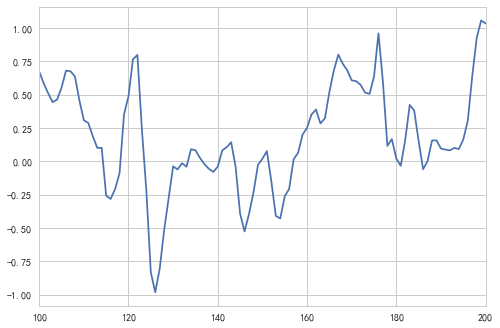

In [92]:
p_data=sensordata.loc[100:200,'y轴旋转角']
describe_data(p_data)
p_data.plot()
# stats.mstats.quantile
# stats.mstats.mquantiles(p_data,prob=0.75)

# 拐弯的检测与判断

# 稳态的分类与判断

## 稳态分类后的处理--张量卷积

In [234]:
Fs=50#hz
#ax,ay,az,anx,any,anz,wx,wy,wz,wnx,wny,wnz
def tensor_make(dfdata,dataname):
    freqlen=2*Fs+1
    fq=np.linspace(0,Fs,freqlen)
    result=np.empty((Fs+1,len(dataname),2))
    for index,item in enumerate(dataname):
#         print item
        data=dfdata[item]
        fftresult=fft(data,freqlen)       
        fm=abs(fftresult)
        fm[0]=fm[0]/freqlen
        fm[1:]=fm[1:]/freqlen*fm[0]#把模值复现出来
        fa=np.angle(fftresult)
        result[:,index,0]=fm[:Fs+1]
        result[:,index,1]=fa[:Fs+1]
    return result
    

In [236]:
dataname=['加速度x','加速度y','加速度z','anx','any','anz','x轴旋转角','y轴旋转角','z轴旋转角','wnx','wny','wnz']
result=tensor_make(sensordata.loc[1:100,:],dataname)

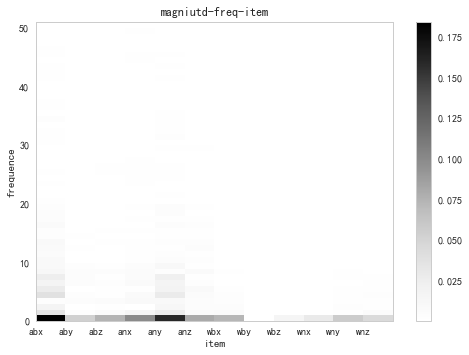

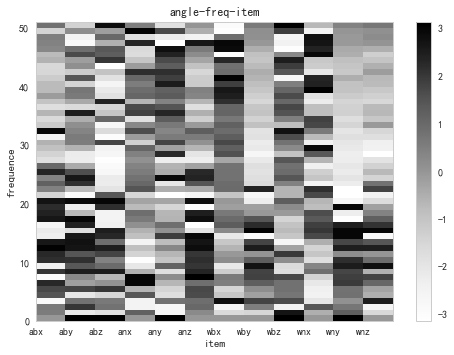

In [237]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.pcolor(result[:,:,0])
plt.title('magniutd-freq-item')
plt.xlabel('item')
plt.ylabel('frequence')
plt.xticks(range(12),['abx','aby','abz','anx','any','anz','wbx','wby','wbz','wnx','wny','wnz'])
plt.colorbar()
plt.show()
plt.pcolor(result[:,:,1])
plt.title('angle-freq-item')
plt.xlabel('item')
plt.ylabel('frequence')
plt.xticks(range(12),['abx','aby','abz','anx','any','anz','wbx','wby','wbz','wnx','wny','wnz'])
plt.colorbar()
# result[:,1,0].shape

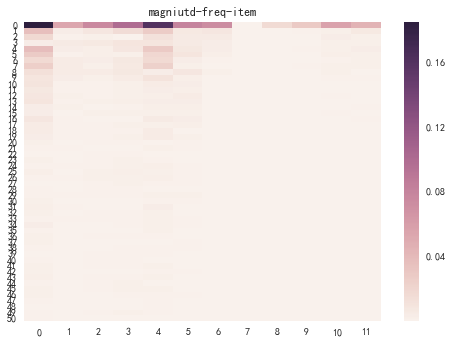

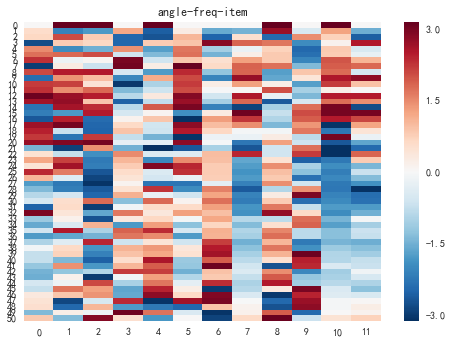

In [238]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
sns.heatmap(result[:,:,0])
# plt.pcolor(result[:,:,0])
plt.title('magniutd-freq-item')
# plt.xlabel('item')
# plt.ylabel('frequence')
# plt.yticks(range(51),np.linspace(25,0,51).tolist())
# plt.xticks(range(12),['abx','aby','abz','anx','any','anz','wbx','wby','wbz','wnx','wny','wnz'])
plt.show()
sns.heatmap(result[:,:,1])
# plt.pcolor(result[:,:,0])
plt.title('angle-freq-item')
# plt.xlabel('item')
# plt.ylabel('frequence')
# plt.yticks(range(51),np.linspace(25,0,51).tolist())
# plt.ylim(range(51),np.linspace(0,25,51))
# plt.xticks(range(12),['abx','aby','abz','anx','any','anz','wbx','wby','wbz','wnx','wny','wnz'])


In [239]:
%%time
slide_windows_length=50
Fs=50
total_length=sensordata.shape[0]
dataname=['加速度x','加速度y','加速度z','anx','any','anz','x轴旋转角','y轴旋转角','z轴旋转角','wnx','wny','wnz']
total_tensor=np.empty((int(total_length/slide_windows_length)+1,Fs+1,len(dataname),2))
for index,item in enumerate(range(0,total_length,slide_windows_length)):
    total_tensor[index]=tensor_make(sensordata.loc[item:item+100,:],dataname)

Wall time: 2.01 s


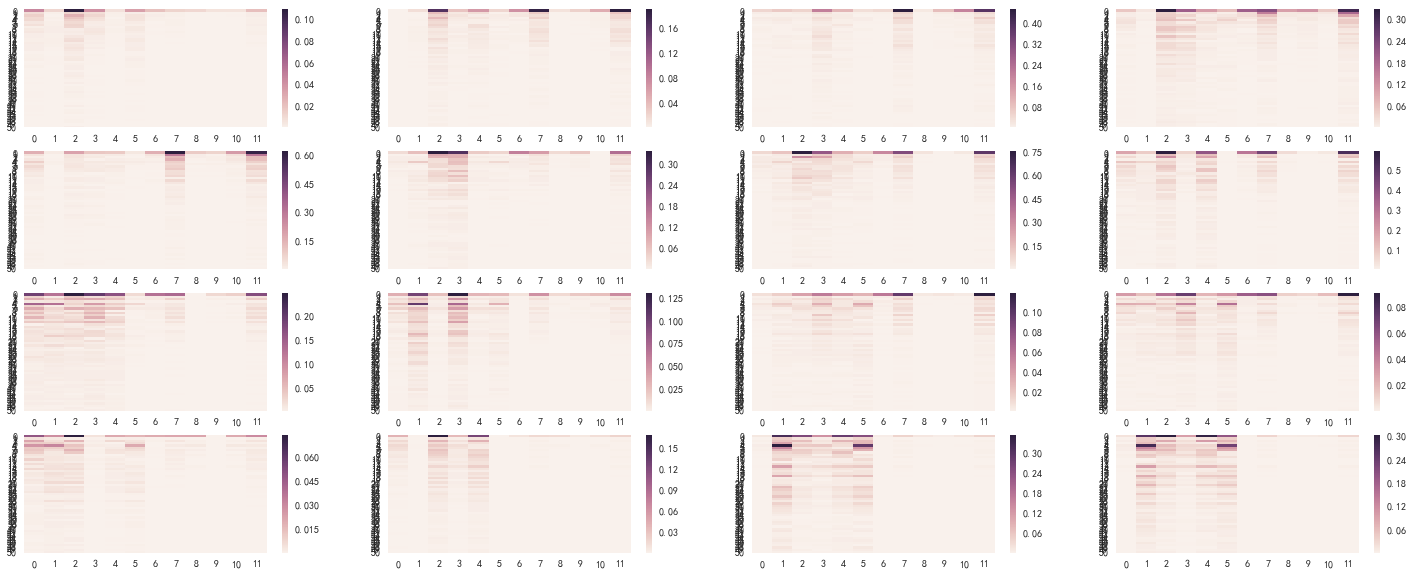

In [240]:
plt.figure(figsize=(25,10))
for item in range(1,17):
    plt.subplot(4,4,item)
    sns.heatmap(total_tensor[item,:,:,0])
#     plt.pause(0.5)

In [233]:
# np.savetxt(r'D:\txc\b1s00totalresult.csv',total_tensor,delimiter=',')

In [241]:
filename=r'D:\txc\total.npy'
np.save(filename,[total_tensor,sensordata])

In [4]:
filename=r'D:\txc\total.npy'
total_tensor,sensordata=np.load(filename)
# s2==sensordata